<a href="https://colab.research.google.com/github/upam00/Covid-19-Dataset-Mining/blob/main/prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prediction of cases on a specific date using decision trees

---


Decision tree is an classification algorithm. For a given data set there can be many decision trees that fits the data. We define the "best" one on the criteria of "less depth" and "less nodes". Given a data set, finding the best decision tree of the data is a computationally hard problem. So we use  greedy strategies. A node splitting is done on parameters like "highest information gain" (which is less entropy), "GINI Index" etc. But the Decision trees can also be used for regression in case of continuous prediction attributes. In this case we can simply change the splitting criteria to "Mean Squared Error". Decision tree suffers from "low bias" and "high variance". This can be overcome by "bagging" technique. Random Forest is an algorithm that uses this technique. 
 
The notbook performs the following operations in order:
* fetch the date vs daily cases data from public APIs. 
* Divide the data into training, validation and test datasets. 
* Build a decision tree regressor using sci-kit learn library.
* Measure it's accuracy.
* Build a Random Forest regressor using sci-kit learn library.
* See if it increases accuracy.





In [ ]:
# to get web contents
import requests
# to parse json contents
import json
# to parse csv files
import csv

# for numerical operations
import numpy as np
# to store and analysis data in dataframes
import pandas as pd

from sklearn import linear_model, datasets, tree
import matplotlib.pyplot as plt

# read data
day_wise = pd.read_csv('https://api.covid19india.org/csv/latest/case_time_series.csv')

# save as a .csv file
day_wise.to_csv('nation_level_daily.csv', index=False)

# first few rows
day_wise.head()



,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January 2020,2020-01-30,1,1,0,0,0,0
1,31 January 2020,2020-01-31,0,1,0,0,0,0
2,1 February 2020,2020-02-01,0,1,0,0,0,0
3,2 February 2020,2020-02-02,1,2,0,0,0,0
4,3 February 2020,2020-02-03,1,3,0,0,0,0


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

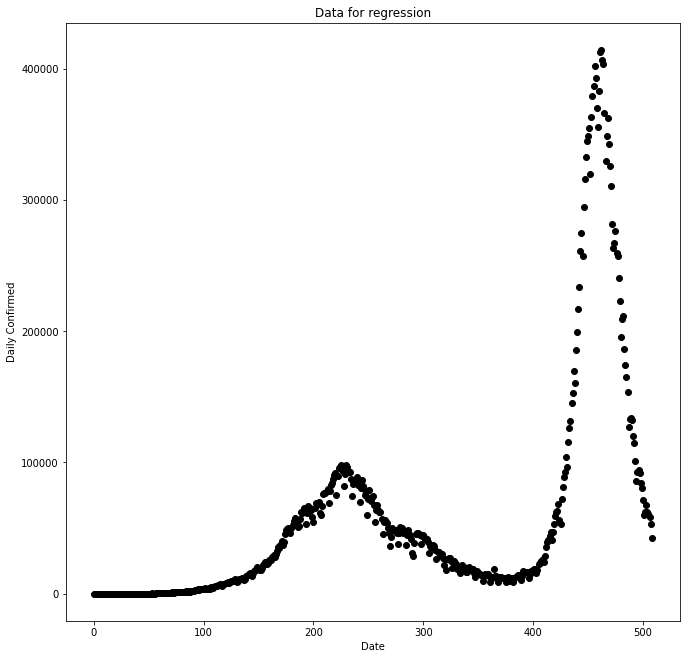

In [ ]:
#day_wise[['Date_YMD', 'Daily Confirmed']]
#x=day_wise['Date']
#x = pd.to_datetime(day_wise['Date_YMD'])    
#x = (x1 - x1.min()) 
#x = np.linspace(1, 509,  509)
x = np.arange(509)
#print(x)
#print(x.is_unique)
y=np.array((day_wise['Daily Confirmed']))
#y=y1.astype(np.float)
#print(y)


plt.figure(figsize=(11, 11))
plt.scatter(x,y,color='black') #Plot y-vs-x in dots
plt.xlabel('Date')
plt.ylabel('Daily Confirmed')
plt.title('Data for regression')
plt.show()

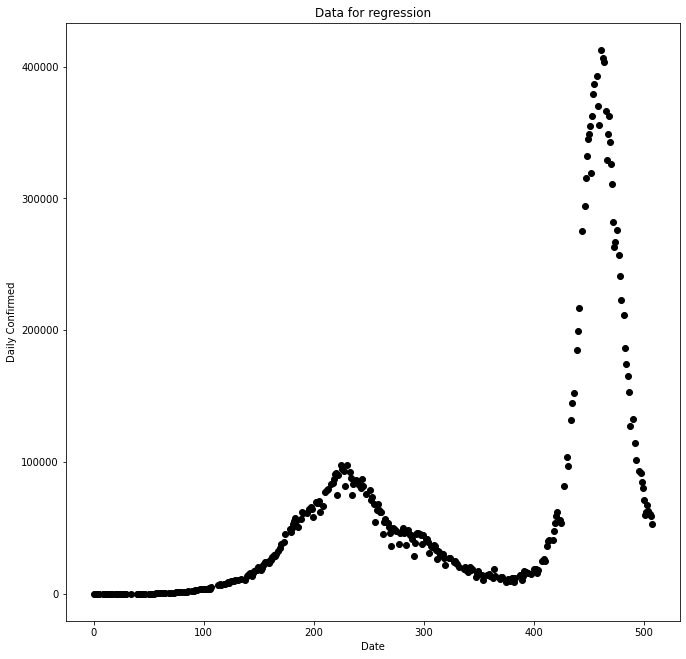

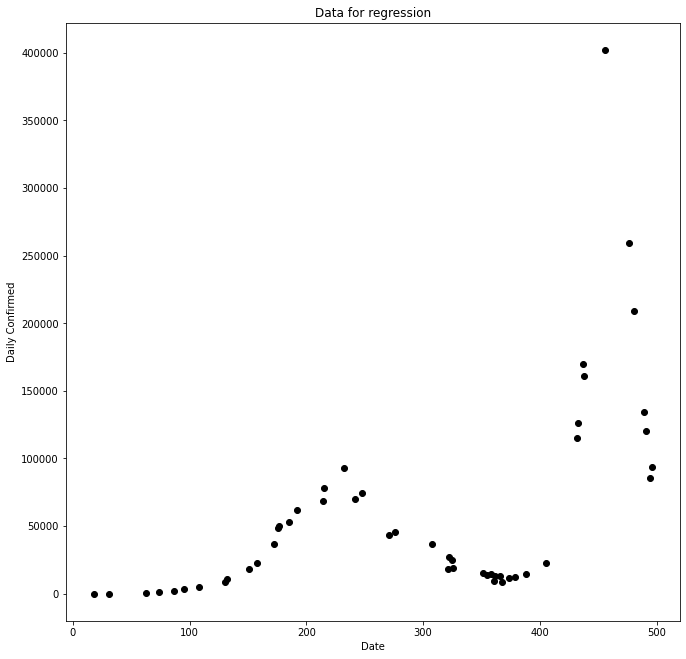

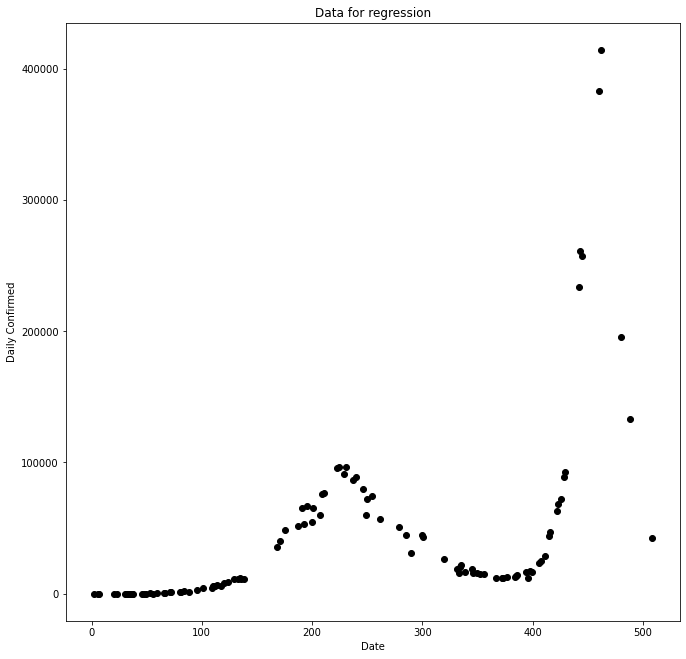

In [ ]:
random_indices = np.random.permutation(509)
#Training set
x_train = x[random_indices[:350]]
y_train = y[random_indices[:350]]
#Validation set
x_val = x[random_indices[350:400]]
y_val = y[random_indices[350:400]]
#Test set
x_test = x[random_indices[400:]]
y_test = y[random_indices[400:]]

plt.figure(figsize=(11, 11))
plt.scatter(x_train,y_train,color='black') #Plot y-vs-x in dots
plt.xlabel('Date')
plt.ylabel('Daily Confirmed')
plt.title('Data for regression')
plt.show()
plt.figure(figsize=(11, 11))
plt.scatter(x_val,y_val,color='black') #Plot y-vs-x in dots
plt.xlabel('Date')
plt.ylabel('Daily Confirmed')
plt.title('Data for regression')
plt.show()
plt.figure(figsize=(11, 11))
plt.scatter(x_test,y_test,color='black') #Plot y-vs-x in dots
plt.xlabel('Date')
plt.ylabel('Daily Confirmed')
plt.title('Data for regression')
plt.show()

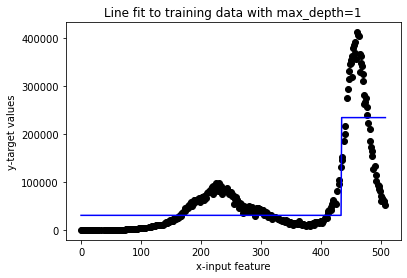

Training MSE:  2904425523.345228 
Validation MSE:  2892036971.8150353 
Test MSE:  1790011537.195441


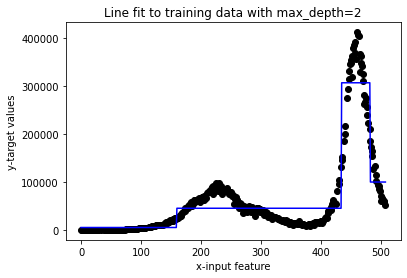

Training MSE:  997668929.9977357 
Validation MSE:  1888950183.096055 
Test MSE:  838604870.873262


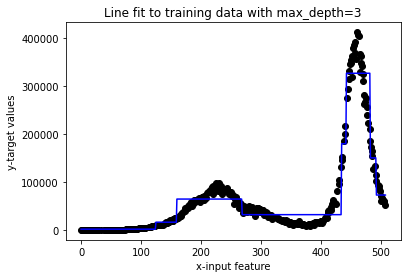

Training MSE:  504124037.3627564 
Validation MSE:  991454871.8430787 
Test MSE:  619047792.0509813


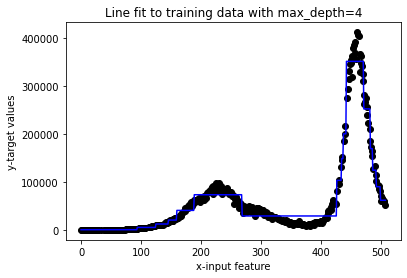

Training MSE:  199776437.6925451 
Validation MSE:  236536605.66425967 
Test MSE:  382891264.49017066


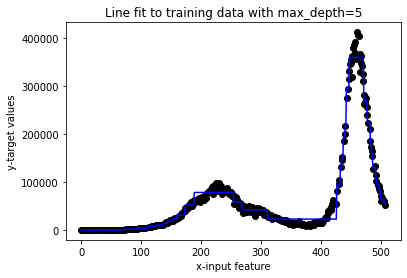

Training MSE:  107022007.17924708 
Validation MSE:  119651908.80265309 
Test MSE:  183733691.66473272


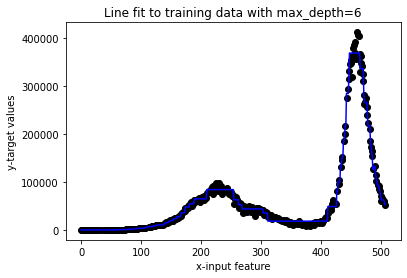

Training MSE:  53253614.288107224 
Validation MSE:  78460513.1410039 
Test MSE:  77064774.02881506


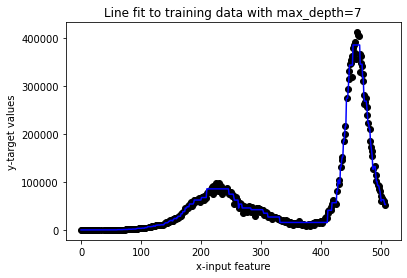

Training MSE:  23176943.748366598 
Validation MSE:  60916174.469191864 
Test MSE:  45426040.71910516


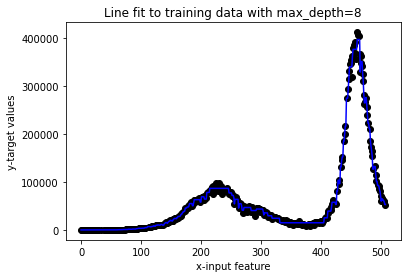

Training MSE:  14884106.057333374 
Validation MSE:  67319202.97837168 
Test MSE:  38389300.1828272


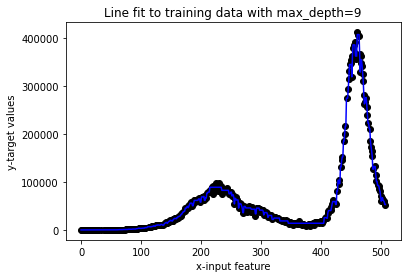

Training MSE:  5309195.939707483 
Validation MSE:  57866161.50412485 
Test MSE:  36659053.032192305


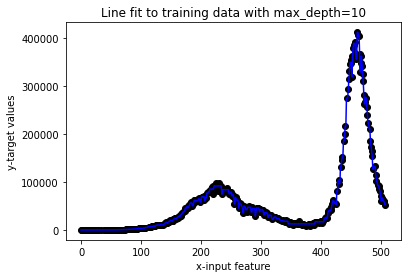

Training MSE:  2169534.8485850343 
Validation MSE:  53954869.8808669 
Test MSE:  39252598.684035085


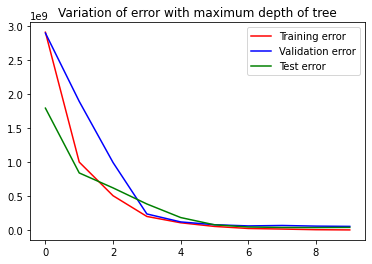

In [ ]:
maximum_depth_of_tree = np.arange(10)+1
train_err_arr = []
val_err_arr = []
test_err_arr = []

for depth in maximum_depth_of_tree:
    
    model = tree.DecisionTreeRegressor(max_depth=depth)
    #sklearn takes the inputs as matrices. Hence we reshpae the arrays into column matrices
    x_train_for_line_fitting = np.matrix(x_train.reshape(len(x_train),1))
    y_train_for_line_fitting = np.matrix(y_train.reshape(len(y_train),1))

    #Fit the line to the training data
    model.fit(x_train_for_line_fitting, y_train_for_line_fitting)

    #Plot the line
    plt.figure()
    plt.scatter(x_train, y_train, color='black')
    plt.plot(x.reshape((len(x),1)),model.predict(x.reshape((len(x),1))),color='blue')
    plt.xlabel('x-input feature')
    plt.ylabel('y-target values')
    plt.title('Line fit to training data with max_depth='+str(depth))
    plt.show()
    
    mean_train_error = np.mean( (y_train - model.predict(x_train.reshape(len(x_train),1)))**2 )
    mean_val_error = np.mean( (y_val - model.predict(x_val.reshape(len(x_val),1)))**2 )
    mean_test_error = np.mean( (y_test - model.predict(x_test.reshape(len(x_test),1)))**2 )
    
    train_err_arr.append(mean_train_error)
    val_err_arr.append(mean_val_error)
    test_err_arr.append(mean_test_error)

    print('Training MSE: ', mean_train_error, '\nValidation MSE: ', mean_val_error, '\nTest MSE: ', mean_test_error)
    
plt.figure()
plt.plot(train_err_arr,c='red')
plt.plot(val_err_arr,c='blue')
plt.plot(test_err_arr,c='green')
plt.legend(['Training error', 'Validation error', 'Test error'])
plt.title('Variation of error with maximum depth of tree')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


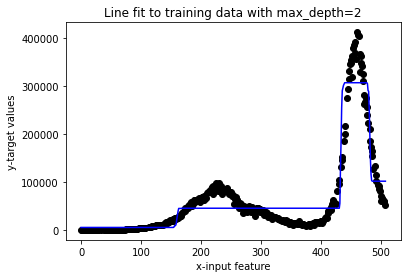

Training MSE:  868642795.6168643 
Validation MSE:  1479968981.662961 
Test MSE:  805943175.3064517


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


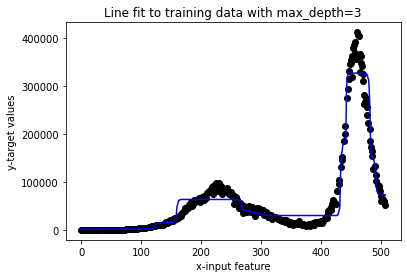

Training MSE:  382187149.2666093 
Validation MSE:  569978497.047964 
Test MSE:  527589462.31772226


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


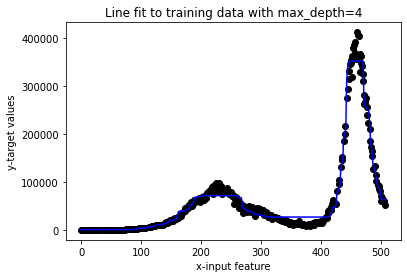

Training MSE:  132116440.82324873 
Validation MSE:  159321096.83746356 
Test MSE:  231458777.19093043


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


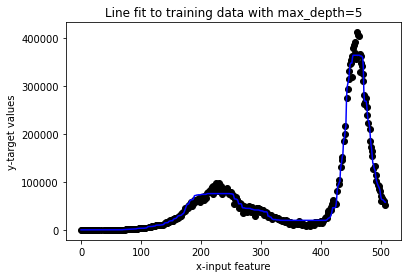

Training MSE:  65640653.87954076 
Validation MSE:  80743601.10284616 
Test MSE:  116508499.1932811


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


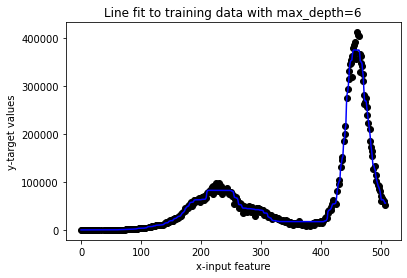

Training MSE:  32204976.502872594 
Validation MSE:  54073580.180817574 
Test MSE:  59428824.67446062


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


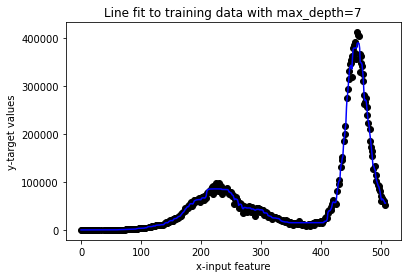

Training MSE:  18344851.272299375 
Validation MSE:  47104967.08106345 
Test MSE:  40203851.396561235


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


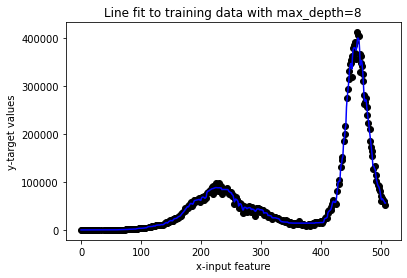

Training MSE:  11907689.388218297 
Validation MSE:  46238475.68750115 
Test MSE:  36521109.49939713


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


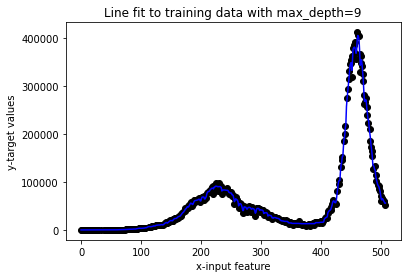

Training MSE:  8748735.636771178 
Validation MSE:  38087023.352463 
Test MSE:  34193854.69464305


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


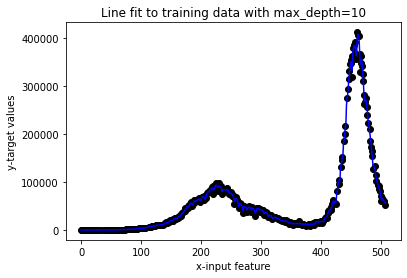

Training MSE:  7083305.8657264495 
Validation MSE:  38327291.58487975 
Test MSE:  29790412.82588219


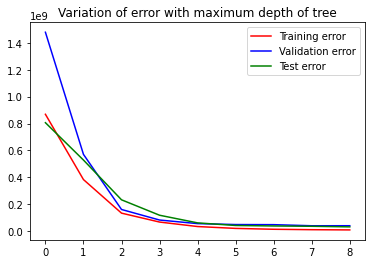

In [ ]:
from sklearn.ensemble import RandomForestRegressor
maximum_depth_of_tree = np.arange(10)+1
train_err_arr = []
val_err_arr = []
test_err_arr = []

for depth in (2,3,4,5,6,7,8,9,10):
    
    model = RandomForestRegressor(max_depth=depth)
    #sklearn takes the inputs as matrices. Hence we reshpae the arrays into column matrices
    x_train_for_line_fitting = np.matrix(x_train.reshape(len(x_train),1))
    y_train_for_line_fitting = np.matrix(y_train.reshape(len(y_train),1))

    #Fit the line to the training data
    model.fit(x_train_for_line_fitting, y_train_for_line_fitting)

    #Plot the line
    plt.figure()
    plt.scatter(x_train, y_train, color='black')
    plt.plot(x.reshape((len(x),1)),model.predict(x.reshape((len(x),1))),color='blue')
    plt.xlabel('x-input feature')
    plt.ylabel('y-target values')
    plt.title('Line fit to training data with max_depth='+str(depth))
    plt.show()
    
    mean_train_error = np.mean( (y_train - model.predict(x_train.reshape(len(x_train),1)))**2 )
    mean_val_error = np.mean( (y_val - model.predict(x_val.reshape(len(x_val),1)))**2 )
    mean_test_error = np.mean( (y_test - model.predict(x_test.reshape(len(x_test),1)))**2 )
    
    train_err_arr.append(mean_train_error)
    val_err_arr.append(mean_val_error)
    test_err_arr.append(mean_test_error)

    print('Training MSE: ', mean_train_error, '\nValidation MSE: ', mean_val_error, '\nTest MSE: ', mean_test_error)
    
plt.figure()
plt.plot(train_err_arr,c='red')
plt.plot(val_err_arr,c='blue')
plt.plot(test_err_arr,c='green')
plt.legend(['Training error', 'Validation error', 'Test error'])
plt.title('Variation of error with maximum depth of tree')
plt.show()

From the result above it looks like there is some amount of overfitting. Both in the case of Decision tree and Random Forest the training error is low compared to testing error.
 
The reason, what we guess, is that we have randomly selected samples from the data. Thus it might happen that the training sample gets more data from the area near the first wave. So naturally it will fail to predict that data near the second wave.
 
To solve this we train our models with periodic data. That is, we train it with all the even days. For validation we take all days that are divisible by 3 and for prediction we use all days divisible by 5. This way our model will have some idea of the complete curve and will be able to predict more accurately. Also there will be less overfitting. Now let's try if our guess is correct or not. 


In [ ]:
random_indices = np.random.permutation(509)
#Training set
x_train = x[0:509:2]
y_train = y[0:509:2]

#Validation set
x_val = x[0:509:3]
y_val = y[0:509:3]

#Test set
x_test = x[5:509:5]
y_test = y[5:509:5]



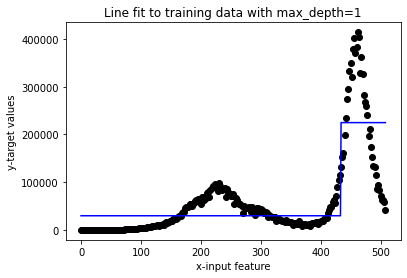

Training MSE:  2688858943.2085624 
Validation MSE:  2698868947.3218865 
Test MSE:  2556352436.2103896


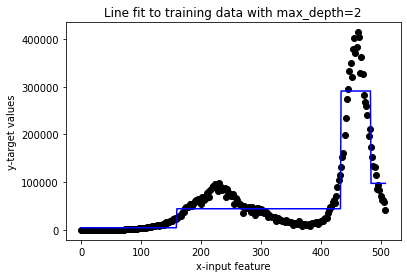

Training MSE:  1119728006.8864813 
Validation MSE:  1144173950.0027397 
Test MSE:  1135082648.7064447


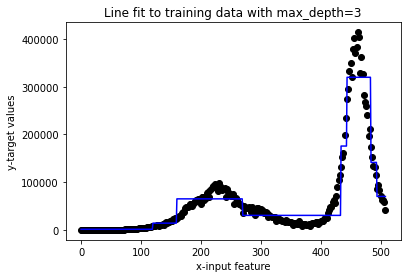

Training MSE:  568052072.224646 
Validation MSE:  635151833.847982 
Test MSE:  559466589.7512226


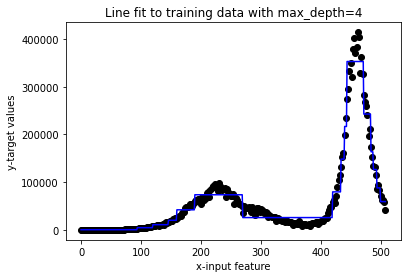

Training MSE:  215972786.07799417 
Validation MSE:  227477145.57228902 
Test MSE:  255806373.8089852


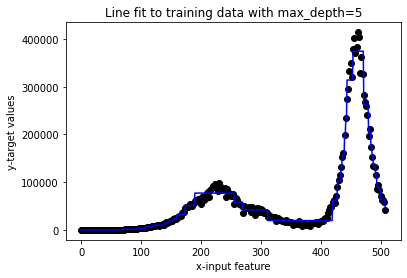

Training MSE:  88945805.24875501 
Validation MSE:  115929644.69883639 
Test MSE:  117118224.99209878


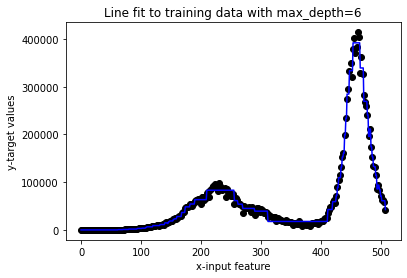

Training MSE:  29265785.306108803 
Validation MSE:  64956379.454414636 
Test MSE:  44553854.987127095


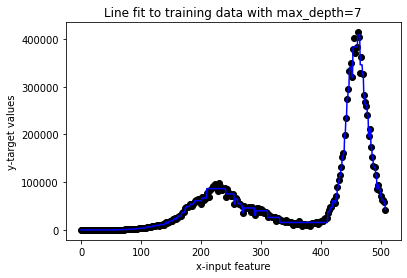

Training MSE:  14112334.516084345 
Validation MSE:  54222539.3794343 
Test MSE:  39820969.7218841


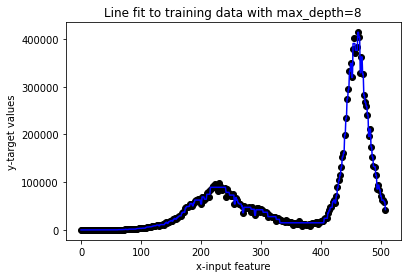

Training MSE:  5872709.85812785 
Validation MSE:  41819244.4908017 
Test MSE:  28947216.765003692


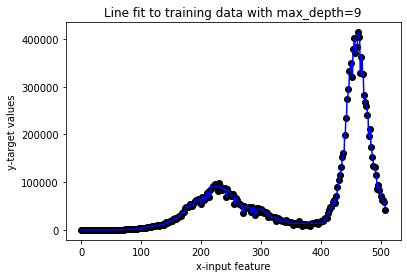

Training MSE:  2543334.1158574545 
Validation MSE:  40326328.77692808 
Test MSE:  28615311.290430773


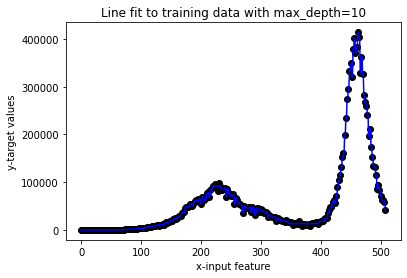

Training MSE:  1541022.0361143432 
Validation MSE:  39611548.84565052 
Test MSE:  27508623.138684355


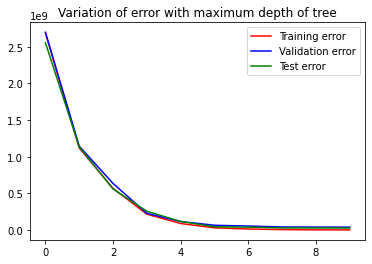

In [ ]:
maximum_depth_of_tree = np.arange(10)+1
train_err_arr = []
val_err_arr = []
test_err_arr = []

for depth in maximum_depth_of_tree:
    
    model = tree.DecisionTreeRegressor(max_depth=depth)
    #sklearn takes the inputs as matrices. Hence we reshpae the arrays into column matrices
    x_train_for_line_fitting = np.matrix(x_train.reshape(len(x_train),1))
    y_train_for_line_fitting = np.matrix(y_train.reshape(len(y_train),1))

    #Fit the line to the training data
    model.fit(x_train_for_line_fitting, y_train_for_line_fitting)

    #Plot the line
    plt.figure()
    plt.scatter(x_train, y_train, color='black')
    plt.plot(x.reshape((len(x),1)),model.predict(x.reshape((len(x),1))),color='blue')
    plt.xlabel('x-input feature')
    plt.ylabel('y-target values')
    plt.title('Line fit to training data with max_depth='+str(depth))
    plt.show()
    
    mean_train_error = np.mean( (y_train - model.predict(x_train.reshape(len(x_train),1)))**2 )
    mean_val_error = np.mean( (y_val - model.predict(x_val.reshape(len(x_val),1)))**2 )
    mean_test_error = np.mean( (y_test - model.predict(x_test.reshape(len(x_test),1)))**2 )
    
    train_err_arr.append(mean_train_error)
    val_err_arr.append(mean_val_error)
    test_err_arr.append(mean_test_error)

    print('Training MSE: ', mean_train_error, '\nValidation MSE: ', mean_val_error, '\nTest MSE: ', mean_test_error)
    
plt.figure()
plt.plot(train_err_arr,c='red')
plt.plot(val_err_arr,c='blue')
plt.plot(test_err_arr,c='green')
plt.legend(['Training error', 'Validation error', 'Test error'])
plt.title('Variation of error with maximum depth of tree')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


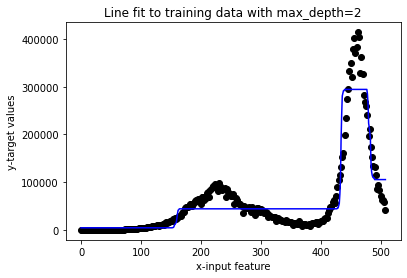

Training MSE:  912107792.1539549 
Validation MSE:  916903119.5787158 
Test MSE:  888388173.8673258


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


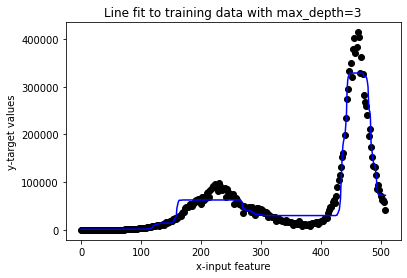

Training MSE:  379177936.7414107 
Validation MSE:  383417421.63960445 
Test MSE:  362668459.15532935


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


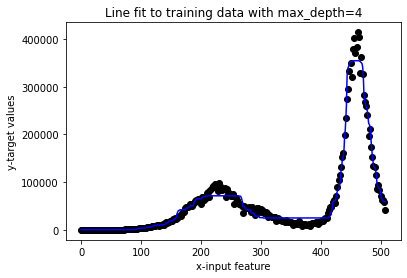

Training MSE:  131651693.06587183 
Validation MSE:  127289884.45320913 
Test MSE:  160481079.24197724


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


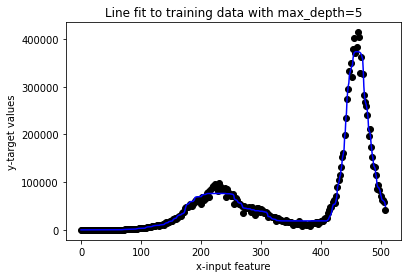

Training MSE:  60402009.27933245 
Validation MSE:  56850518.211556636 
Test MSE:  62027552.41387437


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


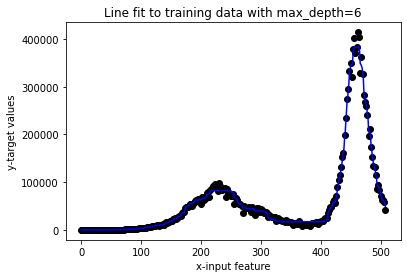

Training MSE:  29870900.89279056 
Validation MSE:  36427446.278990135 
Test MSE:  27629238.05073359


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


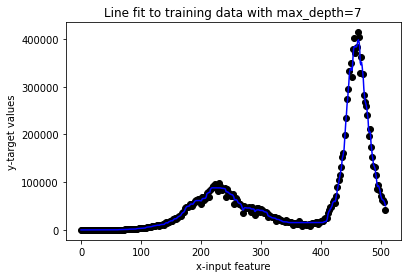

Training MSE:  19014391.24061652 
Validation MSE:  28949555.47550114 
Test MSE:  22746837.575054765


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


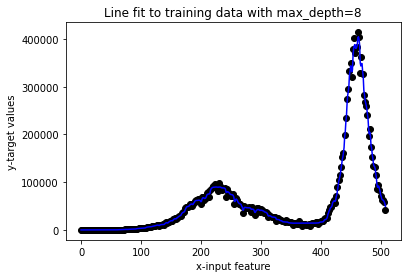

Training MSE:  14347028.575852377 
Validation MSE:  28465330.558509357 
Test MSE:  24093238.692804478


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


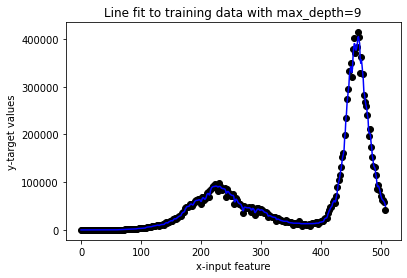

Training MSE:  12864864.753403006 
Validation MSE:  24041238.52299203 
Test MSE:  22119656.115967713


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


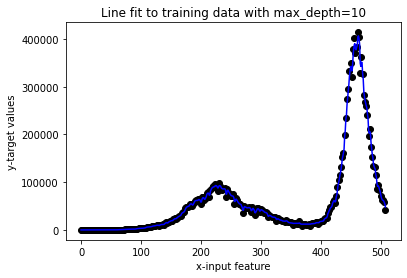

Training MSE:  11669309.377534123 
Validation MSE:  22915664.959633082 
Test MSE:  19824246.203229167


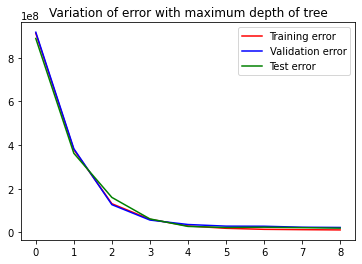

In [ ]:
from sklearn.ensemble import RandomForestRegressor
maximum_depth_of_tree = np.arange(10)+1
train_err_arr = []
val_err_arr = []
test_err_arr = []

for depth in (2,3,4,5,6,7,8,9,10):
    
    model = RandomForestRegressor(max_depth=depth)
    #sklearn takes the inputs as matrices. Hence we reshpae the arrays into column matrices
    x_train_for_line_fitting = np.matrix(x_train.reshape(len(x_train),1))
    y_train_for_line_fitting = np.matrix(y_train.reshape(len(y_train),1))

    #Fit the line to the training data
    model.fit(x_train_for_line_fitting, y_train_for_line_fitting)

    #Plot the line
    plt.figure()
    plt.scatter(x_train, y_train, color='black')
    plt.plot(x.reshape((len(x),1)),model.predict(x.reshape((len(x),1))),color='blue')
    plt.xlabel('x-input feature')
    plt.ylabel('y-target values')
    plt.title('Line fit to training data with max_depth='+str(depth))
    plt.show()
    
    mean_train_error = np.mean( (y_train - model.predict(x_train.reshape(len(x_train),1)))**2 )
    mean_val_error = np.mean( (y_val - model.predict(x_val.reshape(len(x_val),1)))**2 )
    mean_test_error = np.mean( (y_test - model.predict(x_test.reshape(len(x_test),1)))**2 )
    
    train_err_arr.append(mean_train_error)
    val_err_arr.append(mean_val_error)
    test_err_arr.append(mean_test_error)

    print('Training MSE: ', mean_train_error, '\nValidation MSE: ', mean_val_error, '\nTest MSE: ', mean_test_error)
    
plt.figure()
plt.plot(train_err_arr,c='red')
plt.plot(val_err_arr,c='blue')
plt.plot(test_err_arr,c='green')
plt.legend(['Training error', 'Validation error', 'Test error'])
plt.title('Variation of error with maximum depth of tree')
plt.show()

The results now are a bit better as expected. Letting the model learn periodic points on the graph leads to better results. The three errors now are somewhat similar or have less differences. The plot below summarizes the results.
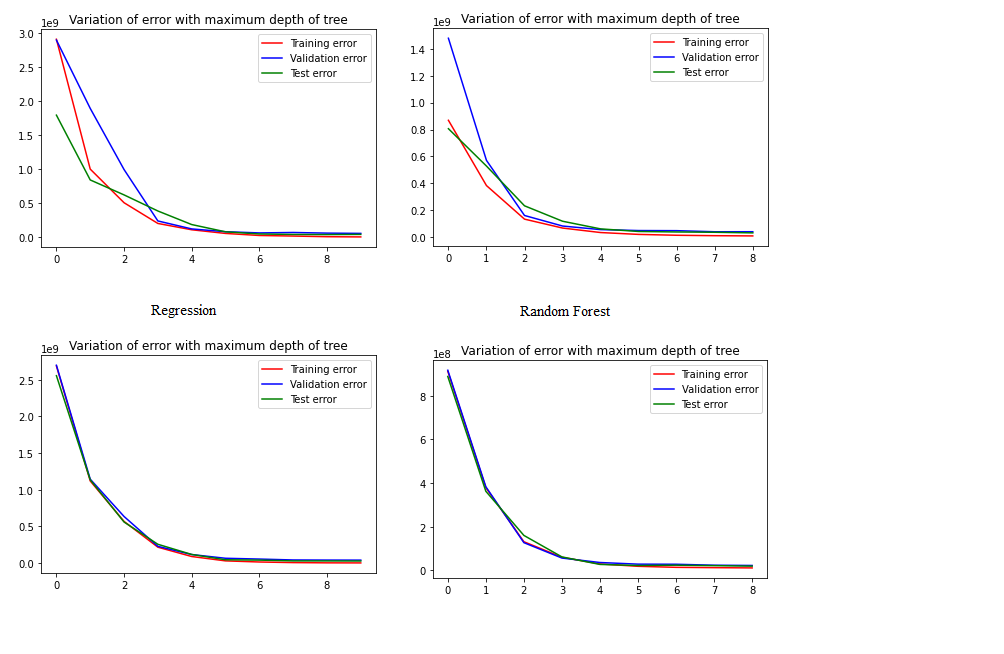